In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [16]:
x = np.arange(-15, 15)

In [31]:
a1 = 0.3
a2 = 0.5
a3_l = [0.1,0.2,0.4,0.8]
a4 = 0.4

Changing a3 changes the slope of the sigmoid

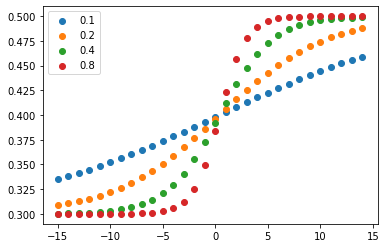

In [32]:
for a3 in a3_l:
    y = np.array([a1 + (a2-a1)/(1+math.exp(-a3*(xi-a4))) for xi in x])
    plt.scatter(x,y)
plt.legend(a3_l)
plt.show()

In [35]:
a1 = 0.3
a2 = 0.5
a3 = 0.4
a4_l = [0,1,5,10]

Changing a4 changes the inflection point of the sigmoid (in the x direction)

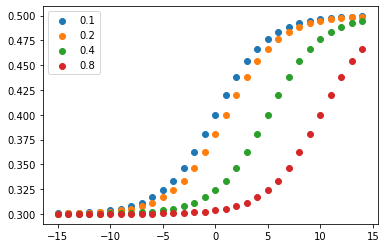

In [36]:
for a4 in a4_l:
    y = np.array([a1 + (a2-a1)/(1+math.exp(-a3*(xi-a4))) for xi in x])
    plt.scatter(x,y)
plt.legend(a3_l)
plt.show()

In [1]:
def double_sig_model(xi, theta):
    a1, a2, a3, a4, a5, a6, a7 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6]
    return a1 + (a2-a1)/(1+math.exp(-a3*(xi-a4))) + (a5-a2)/(1+math.exp(-a6*(xi-a7)))

def compute_square_loss_double_sig(xi, yi, theta):
    loss = (double_sig_model(xi, theta)-yi)**2
    return(loss)

def compute_square_loss_gradient_double_sig(xi, yi, theta):
    a1, a2, a3, a4, a5, a6, a7 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6]
    
    df_da1 = 1 - 1/(1+math.exp(-a3*(xi-a4)))
    df_da2 = 1/(1+math.exp(-a3*(xi-a4))) - 1/(1+math.exp(-a6*(xi-a7)))
    df_da3 = (-1*(a2-a1)/((1+math.exp(-a3*(xi-a4)))**2)) * math.exp(-a3*(xi-a4))*(a4-xi)
    df_da4 = (-1*(a2-a1)/((1+math.exp(-a3*(xi-a4)))**2)) * math.exp(-a3*(xi-a4))*a3
    
    df_da5 = 1/(1+math.exp(-a6*(xi-a7)))
    df_da6 = (-1*(a5-a2)/((1+math.exp(-a6*(xi-a7)))**2)) * math.exp(-a6*(xi-a7))*(a7-xi)
    df_da7 = (-1*(a5-a2)/((1+math.exp(-a6*(xi-a7)))**2)) * math.exp(-a6*(xi-a7))*a6
    
    grad_J = np.array([2*df_da1*(double_sig_model(xi, theta)-yi), 2*df_da2*(double_sig_model(xi, theta)-yi), \
                       2*df_da3*(double_sig_model(xi, theta)-yi), 2*df_da4*(double_sig_model(xi, theta)-yi), \
                       2*df_da5*(double_sig_model(xi, theta)-yi), 2*df_da6*(double_sig_model(xi, theta)-yi), \
                       2*df_da7*(double_sig_model(xi, theta)-yi)])
    return(grad_J)

In [16]:
def stochastic_grad_descent_double_sig(X, y, theta = np.array([0.0,0.5,1.0,0.25,1.0,1.0,0.75]), num_epoch=1000):
    num_instances, num_features = 30, 8
    loss_hist = np.zeros(num_epoch) #Initialize loss_hist
    stepsize = 0.05
    
    for n in range(num_epoch):
        loss = 0
        if n>0 and n%100==0:
            stepsize = stepsize/2
        for i in range(len(X)):
            xi = X[i]
            yi = y[i]
            grad_f = compute_square_loss_gradient_double_sig(xi,yi,theta)
            #step size changes with 1/sqrt(t)
            theta -= stepsize*grad_f
            loss += compute_square_loss_double_sig(xi,yi,theta)
        loss_hist[n]=loss/num_instances
        
    return(theta,loss_hist)

In [17]:
X1 = np.arange(1,250)
X2 = np.arange(1,250)
X3 = np.arange(0.1,3.1,0.1)

theta1 = np.array([0.0,0.47,0.8,0.3,0.994,0.04,158.56])
theta2 = np.array([0.0,0.47,9.865,0.3,0.994,0.04,158.56])
theta3 = np.array([0.0,0.47,0.8,0.3,0.994,0.04,158.56])

y1 = np.array([double_sig_model(xi, theta1) for xi in X1])
y2 = np.array([double_sig_model(xi, theta2) for xi in X2])
y3 = np.array([double_sig_model(xi, theta3) for xi in X3])

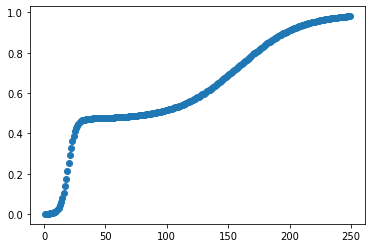

In [13]:
plt.scatter(X,y)

In [14]:
thetas = []
preds_l = []

Final loss: 0.0063658
a1: -0.269, a2: 0.466, a3: 0.124, a4: 11.151, , a5: 0.962, , a6: 0.043, , a7: 150.349


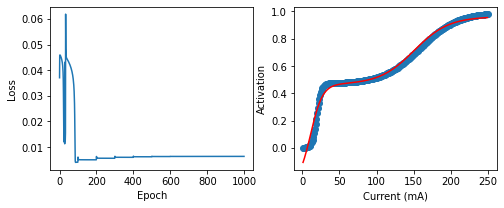

In [15]:
theta, loss_hist = stochastic_grad_descent_double_sig(X, y)
final_loss = round(loss_hist[-1],7)
theta = np.round(theta,3)
print('Final loss: {}'.format(final_loss))
print('a1: {}, a2: {}, a3: {}, a4: {}, , a5: {}, , a6: {}, , a7: {}'.format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6]))
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(8, 3)
ax[0].plot(loss_hist)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

preds = [double_sig_model(xi, theta) for xi in X]
ax[1].plot(X, preds, color ='red')
ax[1].scatter(X, y)
ax[1].set_xlabel('Current (mA)')
ax[1].set_ylabel('Activation')
plt.show()

thetas.append(theta)
preds_l.append(preds)